<div align="center"> 
    
# GBM8378 - Principes d'imagerie biomédicale - Hiver 2021
## Laboratoire 1 - Computed Tomography (Tomodensitométrie)
<br>
    
**Prénom1 Nom1 - Matricule1**  
**Prénom2 Nom2 - Matricule2**
    
</div> 

<div align="center" class="alert alert-block alert-danger">
    <b>Assurez vous d'avoir indiqué vos noms et matricules dans la cellule précédente.</b>
</div>

<div class="alert alert-block alert-danger">
<b>
Avant de commencer à répondre au différentes questions, veuillez vérifier que le Jupyter Notebook fonctionne correctement:
    <br>
    <br>
    1. Redémarrez le noyau (dans la barre de menu : "Kernel" $\rightarrow$ "Restart")
    <br>
    2. Lancez toutes les cellules (dans la barre de menu :  "Cell" $\rightarrow$ "Run All").
</b>
</div>

# <font color='coral'> Travail à effectuer </font>

<div class="alert alert-block alert-info">
<b>Les fonctions fournies dans le ﬁchier `labCTfonction.py` vous seront utiles.
<br><br>
    
Le PDF contenant la partie théorique du TP est disponible sur Moodle.
<br><br>
    
Avant de remettre votre travail, assurez-vous d'avoir rempli toutes les sections `>>>>> Commencez votre code ici <<<<<` et `Double-cliquez pour entrez votre réponse`.</b>
</div>

# Introduction

## <font color='teal'> Questions préliminaires – 5pts </font>

<div class="alert alert-warning">
<b>
1. Quel est l’unité de μ, le coefficient d’atténuation des rayons X? <br><br>
2. L’équation (1) de la partie théorique fait l’hypothèse d’une source de photons monochromatique. Peut-on considérer que chaque photon conserve la même énergie tout au long de sa propagation dans l’objet?<br><br>
3. En pratique les sources à rayons X ne sont pas monochromatiques. Pourquoi ?<br><br>
4. On considère ici que les rayons X se propagent en ligne droite dans l’objet à imager. Comment peut-on rendre l’effet Compton négligeable pour que cette hypothèse soit vraie ?<br><br>
5. À partir de la figure 4, décrivez qualitativement à quoi ressemblerait F(u,v) dans le cas suivant :

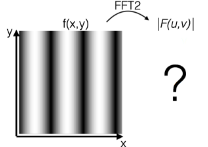
</b>
</div>


<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse <b> </div>

## <font color='teal'> Projection et rétroprojection – 2pts </font>

<div class="alert alert-block alert-info">
    <b>Effectuer la projection et la rétroprojection d’une image fantôme.</b> <br>
Charger le fichier "sinogramme". Celui-ci a été réalisé à partir de 180 projections acquises pour θ = [0 179]°.
</div>

In [ ]:
# Dans cette cellule, nous importons les librairies/fonctions qui nous serviront dans ce notebook.
# N'hésitez pas à importer d'autres fonctions si besoin (pensez à relancer la cellule à chaque ajout).
import numpy as np
import matplotlib.pyplot as plt
import labCTfunctions as labCT
from scipy.ndimage import convolve
from scipy.ndimage.interpolation import rotate
from numpy.fft import fft, fft2, fftshift, ifft, ifftshift
from skimage.transform import radon, iradon

%matplotlib inline

In [ ]:
# Ceci est un cellule de code Python. Pour éxecuter le code contenu dans la cellule, appuyez sur le bouton "éxécuter" dans la
# barre des tâches ou bien appuyez sur "ctrl+entrer".

# Charger le sinogramme. Pour comprendre comment ce sinogramme est obtenu, vous pouvez regarder le fichier "labCTfunctions.py".
sino_ES_S = labCT.load_sinogram()

# Afficher le sinogramme
plt.figure(figsize=[5, 5]) # plt.figure permet de gérer certains paramètres d'affichage
plt.imshow(sino_ES_S) # plt.imshow permet d'afficher une image
plt.xlabel('Projection angle [$^{\circ}$]') # plt.xlabel permet d'ajouter un titre sur l'axe des abcisses
plt.ylabel('Projection position [pixels]'); # plt.ylabel permet d'ajouter un titre sur l'axe des ordonnées

<div class="alert alert-warning">
    <b>1. Effectuer la rétroprojection du sinogramme à l’aide de la fonction retroprojection. (1pt)</b>
</div>

In [ ]:
angles = range(180)

# Calculez et affichez la rétroprojection (4 lignes maximum).
# >>>>> Commencez votre code ici <<<<<

<div class="alert alert-warning">
    <b>2. Pourquoi le sinogramme a-t-il été acquis sur 180$^{\circ}$ plutôt que sur 360$^{\circ}$ ? (1pt)</b>
</div>

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse <b> </div>

## <font color='teal'> Rétroprojection filtrée – 5pts </font>

<div class="alert alert-warning">
<b> 1. Par quelle opération mathématique peut-on appliquer le filtre rampe |ω| dans le domaine fréquentiel ? (1pt) </b>
<div>
 

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse <b> </div>

<div class="alert alert-warning">
<b> 2. Transcrire l’expression dans le domaine image (spatial). (1pt)</b>
<div>
   

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse <b> </div>

<div class="alert alert-warning">
<b>
3. Appliquez les filtres suivants à votre sinogramme et comparez les reconstructions obtenues:<br>
&nbsp;- aucun filtre<br>
&nbsp;- un filtre |ω|<br>
&nbsp;- un filtre |ω| avec fenêtrage de hanning<br>

Ci dessous, le filtre |ω| vous est présenté dans chacun des espaces d'intêret. Sélectionnez le.s filtres appropriés pour vos calculs. Justifiez vos choix. (2pt)
</div>

In [ ]:
# Construction et affichage des filtres que vous pourrez utiliser:

nb_pixels = len(sino_ES_S)
# Rampe dans l'espace de Fourier shifté (en 1D, basses fréquences au centre):
ramp_EF_S = [abs(nb_pixels / 2 - i) for i in range(nb_pixels)]
# Rampe dans l'espace de Fourier non shifté (en 1D, basses fréquences sur les bords):
ramp_EF_NS = ifftshift(ramp_EF_S)
# Rampe dans l'espace spatial non shifté:
ramp_ES_NS = np.real(ifft(ramp_EF_NS))
# Rampe dans l'espace spatial shifté:
ramp_ES_S = fftshift(ramp_ES_NS)

plt.figure(figsize=[20, 10])
plt.subplot(2, 2, 1)
plt.plot(ramp_EF_S)
plt.title('Rampe dans l\'espace de Fourier shifté')
plt.subplot(2, 2, 2)
plt.plot(ramp_EF_NS)
plt.title('Rampe dans l\'espace de Fourier non shifté')
plt.subplot(2, 2, 3)
plt.plot(ramp_ES_NS)
plt.title('Rampe dans l\'espace spatial non shifté')
plt.subplot(2, 2, 4)
plt.plot(ramp_ES_S)
plt.title('Rampe dans l\'espace spatial shifté');

In [ ]:
# ==== Filtrage dans l'Espace Fourier shifté (4 lignes max) ====>

# >>>>> Commencez votre code ici <<<<<

retro_filtre_fourier = 

# ==== Filtrage dans l'Espace Spatial shifté (5 lignes max) ====>

# >>>>> Commencez votre code ici <<<<<

retro_filtre_spatial=

# ==== Filtrage dans l'Espace Spatial shifté + filtre de hanning ====>

# >>>>> Commencez votre code ici <<<<<

retro_filtre_spatial_hann = 

# Affichage des images reconstruites:
plt.figure(figsize=[15, 15])
plt.subplot(221); plt.imshow(labCT.retroprojection(sino_ES_S,angles)); plt.title('Reconstruit sans filtre')
plt.subplot(222); plt.imshow(retro_filtre_fourier); plt.title('Filtre appliqué dans l\'espace de Fourier')
plt.subplot(223); plt.imshow(retro_filtre_spatial); plt.title('Filtre appliqué dans l\'espace spatial')
plt.subplot(224); plt.imshow(retro_filtre_spatial_hann); plt.title('Filtre appliqué dans l\'espace spatial + hanning');

<div class="alert alert-warning">
<b>
4. Expliquer l'intérêt du filtre |ω| . Expliquer l'intérêt du fenêtrage de hanning. L'espace d'application du filtre (spatial ou fréquentiel) a-t-il un effet sur les images filtrées? (1pt)</b>
</div>

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse <b> </div>

## <font color='teal'> Performance de la rétroprojection filtrée – 2pts	 </font>

<div class="alert alert-warning">
<b>
1. Comparer les rétroprojections ﬁltrées effectuées pour 4, 16, 90 et 180 rétroprojections. (1.5pt)<br>
</b>
</div>

In [ ]:
# Performance de la rétroprojection filtrée
n_angles=[4, 16, 90, 180];

plt.figure(figsize = [15, 15])
for n in range(4):
    # >>>>> Commencez votre code ici <<<<<
    

<div class="alert alert-warning">
<b>
2. Qu’arrive-t-il si les rétroprojections sont effectuées pour des angles qui ne sont pas régulièrement espacés ? Illustrez ce phénomène. (0.5pt)
</b>
</div>

In [ ]:
# >>>>> Commencez votre code ici <<<<<

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse <b> </div>

## <font color='teal'>Théorème de la tranche centrale – 3pts	 </font>

<div class="alert alert-warning">
<b>Montrez que la transformée de Fourier de la projection de l’image pour un angle θ est l’équivalent de la tranche d’angle θ de la transformée de Fourier 2D de $f(x, y)$.
<br><br>
Pour cela, écrivez un script permettant d’afficher la transformée de Fourier de la projection de l’image pour un angle θ ainsi que la tranche centrale d’angle θ de la transformée de Fourier 2D de $f(x, y)$. Faire la comparaison pour 4 angles différents. Utiliser une échelle logarithmique pour mieux visualiser vos résultats. Expliquez. (3pt)</b><br>

Astuce: la fonction [<b>scipy.ndimage.interpolation.rotate</b>](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.interpolation.rotate.html) permet de rotater une image d'un certain angle.
</div>

In [ ]:
# >>>>> Commencez votre code ici <<<<<

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse <b> </div>

## <font color='teal'>Analyse du bruit – 3pts</font>

<div class="alert alert-warning">
<b>
1. Quel est le type de bruit observé en imagerie par rayon X ? Quelle est l’origine de ce bruit ? (0.5pt)<br>
</b>
</div>

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse <b> </div>

<div class="alert alert-warning">
<b>
2. Simuler 1000 fois la détection d’un capteur qui a reçu 5 photons (utiliser une fonction de distribution aléatoire pour générer un vecteur de 1000 éléments). Tracer l’histogramme des valeurs mesurées par ce capteur (fonction "plt.hist"). Refaites l’expérience avec 10, 50, et 1000 photons reçus.  (0.5pt)</b><br>
    
La fonction [<b>numpy.random.poisson</b>](https://numpy.org/doc/stable/reference/random/generated/numpy.random.poisson.html) vous sera utile.

</div>

In [ ]:
nb_photons = [5, 10, 50, 1000]

# >>>>> Commencez votre code ici <<<<<

<div class="alert alert-warning">
<b>
3. Ajouter du bruit à l’image filtrée/fenêtrée de la section « Rétroprojection filtrée » pour simuler le bruit d’acquisition lors d’un CT scan (attention à placer le bruit au bon endroit pour modéliser le phénomène physique en cause). Montrez la rétroprojection obtenue. (1pt)<br>
</b>
</div>

In [ ]:
lambda_nominal = 100 # Quantité de radiations totale

# >>>>> Commencez votre code ici <<<<<

<div class="alert alert-warning">
<b>
4. Comment peut-on modéliser une quantité de radiations 2 fois plus grande ?  (0.5pt)<br>
</b>
</div>

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse <b> </div>

<div class="alert alert-warning">
<b>
5. Pour une même quantité de radiations, comparer des scans acquis:
    <br><br>
     - avec un grand nombre d’angles et une petite quantité de radiations pour chaque angle.
    <br>
     - avec un petit nombre d’angles et une grande quantité de radiations pour chaque angle.
    <br><br>
Montrez les résultats obtenus pour 4, 16, 90 et 180 angles. Quel choix vous semble être le meilleur d’un point de vue clinique?  (0.5pt)
</b>
</div>

In [ ]:
# >>>>> Commencez votre code ici <<<<<

plt.figure(figsize=[15,15])
plt.subplot(421); plt.imshow(sino4_bruite,aspect='auto'); plt.title(f'Sinogramme avec 4 angles, lambda= {str(lambda4)}')
plt.subplot(422); plt.imshow(retro4_bruite,); plt.title(f'Rétroprojection avec 4 angles, lambda= {str(lambda4)}')
plt.subplot(423); plt.imshow(sino16_bruite,aspect='auto'); plt.title(f'Sinogramme avec 16 angles, lambda= {str(lambda16)}')
plt.subplot(424); plt.imshow(retro16_bruite); plt.title(f'Rétroprojection avec 16 angles, lambda= {str(lambda16)}')
plt.subplot(425); plt.imshow(sino90_bruite,aspect='auto'); plt.title(f'Sinogramme avec 90 angles, lambda= {str(lambda90)}')
plt.subplot(426); plt.imshow(retro90_bruite); plt.title(f'Rétroprojection avec 90 angles, lambda=, {str(lambda90)}')
plt.subplot(427); plt.imshow(sino180_bruite,aspect='auto'); plt.title(f'Sinogramme avec 180 angles, lambda= {str(lambda180)}')
plt.subplot(428); plt.imshow(retro180_bruite); plt.title(f'Rétroprojection avec 180 angles, lambda= {str(lambda180)}');

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse <b> </div>

## <font color='teal'>Conclusion</font>

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse <b> </div>